## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression predicts a numeric outcome, while classification predicts a categorical outcome.
2. A cross-tabulation of predicted and actual values. It helps us understand by showing the number of true positives, true negatives, false positives, and false negatives, allowing us to calculate different metrics of accuracy.
3. It quantifies the total squared differences between the predicted and actual values, measuring the model's overall error.
4. Overfitting is when the model performs too well on the training data, causing it to not do well on new data. Underfitting happens when a model is too simple to capture patterns in the data, resulting in poor performance on both training and test data.
5. Splitting helps the model by allowing it to learn patterns from the training data while also being able to test its performance on unseen data. choosing an optimal $k$ based on accuracy/SSE ensures the model balances bias and variance, reducing the risk of overfitting or underfitting.
6. Reporting a class label as a prediction is simple, making decisions easy to understand, but lacks information about uncertainty. Providing a probability distribution over class labels shows us insight into the model's confidence, but it can be harder to interpret.

In [227]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [228]:
# Load dataset and drop all but needed columns
cars = pd.read_csv("../data/USA_cars_datasets.csv")
cars = cars[["price", "year", "mileage"]]

In [229]:
# Check for missing values
cars.isna().sum()

price      0
year       0
mileage    0
dtype: int64

In [230]:
# Show head and dimensions
print(cars.head())
print(cars.shape)

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


In [231]:
# Normalize using minmax
mm_scaler = MinMaxScaler()
cars[['year', 'mileage']] = mm_scaler.fit_transform(cars[["year", "mileage"]])

In [232]:
# Split data
X = cars[["year", "mileage"]]
y = cars["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

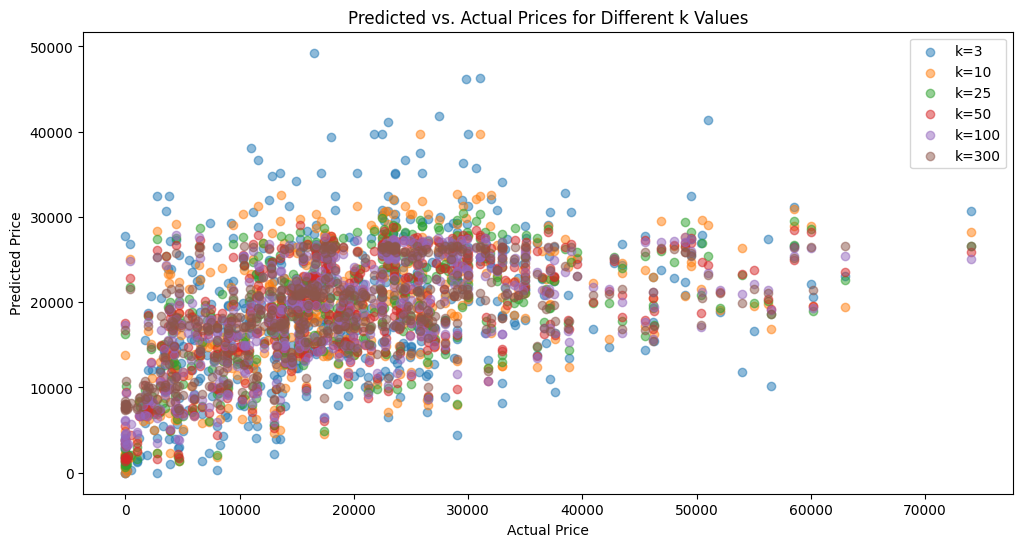

In [233]:
# Train and evaluate for different k vals
ks = [3,10,25,50,100,300]
mse_vals = []
plt.figure(figsize=(12, 6))

for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_vals.append(mse)

    plt.scatter(y_test, y_pred, alpha=0.5, label=f'k={k}')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.title("Predicted vs. Actual Prices for Different k Values")
plt.show()

As k increases, predictions shift from high variance and overfitting to overly smooth and underfitting with a large k, with an optimal k balancing both to minimize MSE.

In [234]:
# Determine the optimal k (lowest MSE)
optimal_k = ks[np.argmin(mse_vals)]
optimal_k

50

In [235]:
# As k increases:
# - Small k (e.g., k=3) leads to overfitting, capturing noise and fluctuating predictions.
# - Large k (e.g., k=300) results in underfitting, where predictions are overly smoothed.
# - The optimal k balances both, minimizing the test error.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [236]:
# Load data
animals = pd.read_csv("../data/zoo.csv")

In [237]:
# Display unique animals per class to understand grouping
for cl in sorted(animals['class'].unique()):
    animals_in_class = animals.loc[animals['class'] == cl, 'animal'].tolist()
    print(f"Class {cl}: {animals_in_class}")
    print("-"*40)

Class 1: ['aardvark', 'antelope', 'bear', 'boar', 'buffalo', 'calf', 'cavy', 'cheetah', 'deer', 'dolphin', 'elephant', 'fruitbat', 'giraffe', 'girl', 'goat', 'gorilla', 'hamster', 'hare', 'leopard', 'lion', 'lynx', 'mink', 'mole', 'mongoose', 'opossum', 'oryx', 'platypus', 'polecat', 'pony', 'porpoise', 'puma', 'pussycat', 'raccoon', 'reindeer', 'seal', 'sealion', 'squirrel', 'vampire', 'vole', 'wallaby', 'wolf']
----------------------------------------
Class 2: ['chicken', 'crow', 'dove', 'duck', 'flamingo', 'gull', 'hawk', 'kiwi', 'lark', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'rhea', 'skimmer', 'skua', 'sparrow', 'swan', 'vulture', 'wren']
----------------------------------------
Class 3: ['pitviper', 'seasnake', 'slowworm', 'tortoise', 'tuatara']
----------------------------------------
Class 4: ['bass', 'carp', 'catfish', 'chub', 'dogfish', 'haddock', 'herring', 'pike', 'piranha', 'seahorse', 'sole', 'stingray', 'tuna']
----------------------------------------
Class 5: ['fr

In [238]:
# Class sizes
animals["class"].value_counts()

class
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [239]:
# Basic statistics for the 16 features
feature_cols = animals.drop(columns=['class', 'animal'])
print("\nFeature statistics:")
print(feature_cols.describe())


Feature statistics:
             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std   

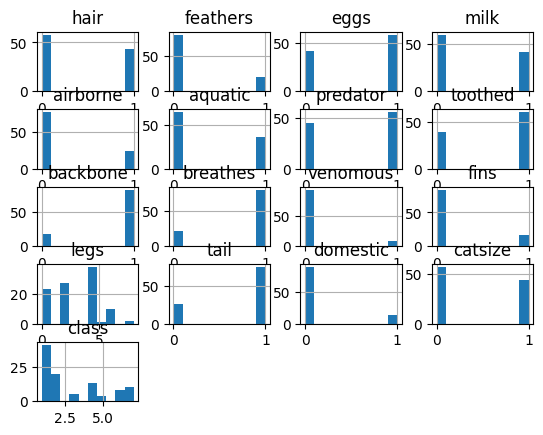

In [240]:
# Visualize distributions for each numeric feature
animals.hist(bins=10)
plt.show()

In [241]:
# Some features such as hair or feathers vary considerably between classes and could be good predictors. Features like hair or feathers are key to distinguishing mammals and birds.

In [242]:
# Split data 50/50 into training and testing sets
target = animals["class"]

X_train, X_test, y_train, y_test = train_test_split(
    feature_cols, target, test_size=0.5, random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (50, 16)
Test set shape: (51, 16)


In [243]:
k_bar = 20
accs = []

N_test = len(y_test)

# Loop over k values from 1 to k_bar
for k in range(1, k_bar+1):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train.values, y_train)
    y_hat = knn.predict(X_test.values)
    acc = np.sum(y_hat == y_test) / N_test
    accs.append(acc)

    print(f"accuracy for k={k}: {acc}")

accuracy for k=1: 0.9411764705882353
accuracy for k=2: 0.9019607843137255
accuracy for k=3: 0.803921568627451
accuracy for k=4: 0.7647058823529411
accuracy for k=5: 0.7647058823529411
accuracy for k=6: 0.7450980392156863
accuracy for k=7: 0.7450980392156863
accuracy for k=8: 0.7450980392156863
accuracy for k=9: 0.7450980392156863
accuracy for k=10: 0.6862745098039216
accuracy for k=11: 0.6470588235294118
accuracy for k=12: 0.6470588235294118
accuracy for k=13: 0.6470588235294118
accuracy for k=14: 0.6470588235294118
accuracy for k=15: 0.6078431372549019
accuracy for k=16: 0.6078431372549019
accuracy for k=17: 0.6078431372549019
accuracy for k=18: 0.6078431372549019
accuracy for k=19: 0.6078431372549019
accuracy for k=20: 0.6078431372549019


In [244]:
optimal_k = 1
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train.values, y_train)

y_hat = knn.predict(X_test.values)
pd.crosstab(y_test, y_hat)

col_0,1,2,4
class,,,
1,20,2,2
2,0,6,0
3,1,1,1
4,0,0,5
5,3,0,0
6,5,0,0
7,3,2,0


In [245]:
# The model has an accuraxy of 64%. Most misclassifications occur in classes 5, 6, and 7, which are often predicted as class 1, suggesting overlapping features or imbalanced representation. Since k=1, the model relies heavily on a single nearest neighbor, making it more sensitive to noise and misclassification in closely related classes.

In [246]:
# Train with selected features
feature_subset = ["milk", "aquatic", "airborne"]
X_train = X_train[feature_subset]
X_test = X_test[feature_subset]

In [247]:
knn_subset = KNeighborsClassifier(n_neighbors=optimal_k)
knn_subset.fit(X_train.values, y_train)

KNeighborsClassifier(n_neighbors=1)

In [248]:
y_hat = knn_subset.predict(X_test.values)
pd.crosstab(y_test, y_hat)

col_0,1,2,4,7
class,,,,
1,24,0,0,0
2,0,6,0,0
3,0,0,1,2
4,0,0,5,0
5,0,0,3,0
6,0,5,0,0
7,0,0,3,2


In [249]:
# Not all classes are represented in the predictions. This suggests that using only the milk, aquatic, and airborne features does not provide enough information for certain classes, causing the model to group them into subsets. Some classes probably share similar values for these features.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [250]:
college = pd.read_csv("../data/college_completion.csv")
college.shape

(3798, 63)

In [251]:
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [252]:
# cross tab control and level
ct = pd.crosstab(college["control"], college["level"])
ct

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


In [253]:
# Private for-profit institutions are roughly split between 2-year and 4-year programs, while private not for profit institutions are mostly 4-year. Public institutions have a higher count of 2-year programs than 4-year programs.

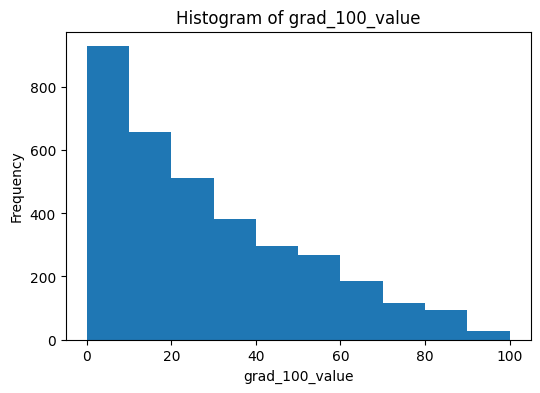

In [254]:
# grad_100_value histogram
plt.figure(figsize=(6,4))
plt.hist(college['grad_100_value'].dropna())
plt.title('Histogram of grad_100_value')
plt.xlabel('grad_100_value')
plt.ylabel('Frequency')
plt.show()


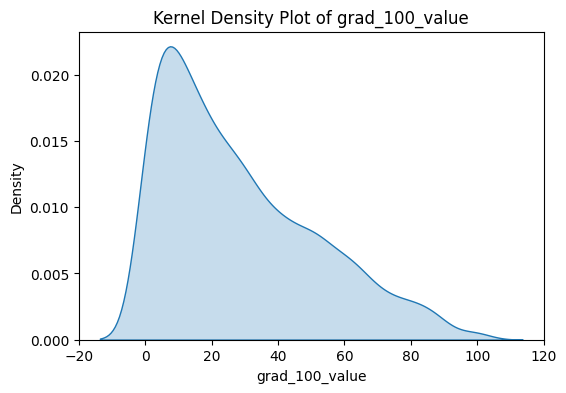

In [255]:
# grad_100_value kdp
plt.figure(figsize=(6,4))
sns.kdeplot(data=college, x='grad_100_value', fill=True)
plt.title('Kernel Density Plot of grad_100_value')
plt.xlabel('grad_100_value')
plt.show()

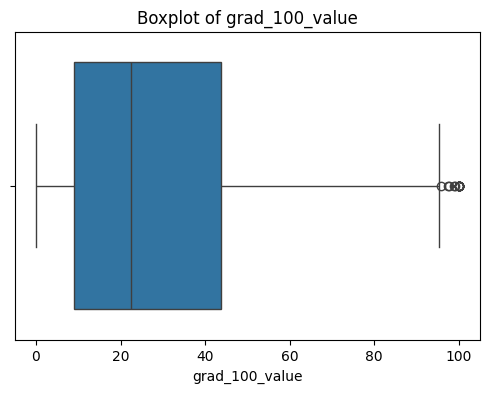

In [256]:
# grad_100_value boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x='grad_100_value', data=college)
plt.title('Boxplot of grad_100_value')
plt.xlabel('grad_100_value')
plt.show()

In [257]:
# grad_100_value statistical description
college["grad_100_value"].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

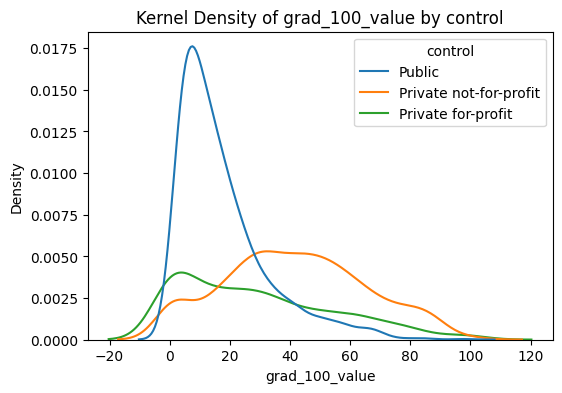

In [258]:
# Grouped kde by control
plt.figure(figsize=(6,4))
sns.kdeplot(data=college, x='grad_100_value', hue='control')
plt.title('Kernel Density of grad_100_value by control')
plt.xlabel('grad_100_value')
plt.show()

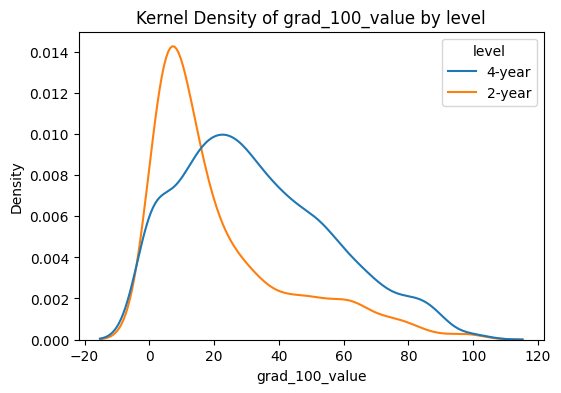

In [259]:
# Grouped kde by level
plt.figure(figsize=(6,4))
sns.kdeplot(data=college, x='grad_100_value', hue='level')
plt.title('Kernel Density of grad_100_value by level')
plt.xlabel('grad_100_value')
plt.show()

In [260]:
print(college.groupby('control')['grad_100_value'].describe())

                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


In [261]:
print(college.groupby('level')['grad_100_value'].describe())

         count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


In [262]:
# Public 2-year colleges seem to have the best graduation rates, followed by public 4-year colleges.

In [263]:
college["levelXcontrol"] = college["level"] + "," + college["control"]

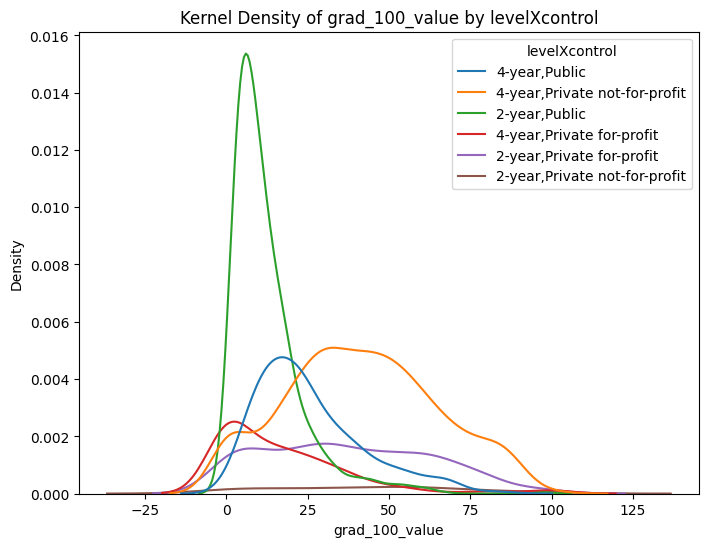

In [264]:
# grouped kdp
plt.figure(figsize=(8, 6))
sns.kdeplot(data=college, x='grad_100_value', hue='levelXcontrol')
plt.title('Kernel Density of grad_100_value by levelXcontrol')
plt.xlabel('grad_100_value')
plt.show()

In [265]:
# It appears that public 2-year colleges have the highest density by a very wide margin. The next best densities are between 4 year private not for profit and 4 year public colleges.

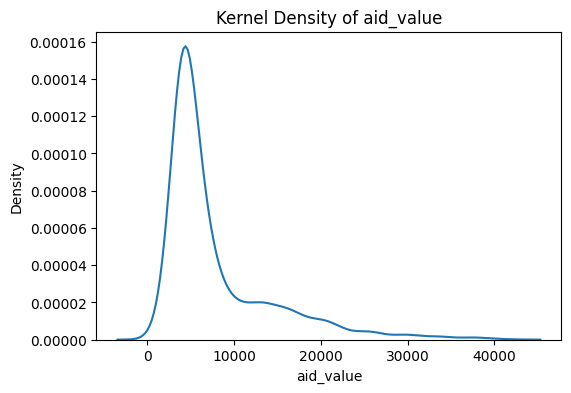

In [266]:
# kdp of aid_value
plt.figure(figsize=(6,4))
sns.kdeplot(data=college, x='aid_value')
plt.title('Kernel Density of aid_value')
plt.xlabel('aid_value')
plt.show()

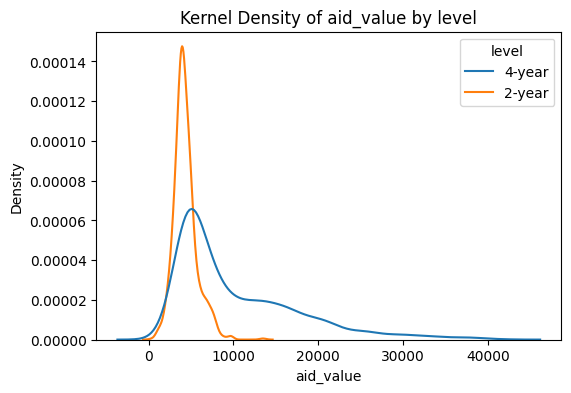

In [267]:
# grouped by level
plt.figure(figsize=(6,4))
sns.kdeplot(data=college, x='aid_value', hue='level')
plt.title('Kernel Density of aid_value by level')
plt.xlabel('aid_value')
plt.show()

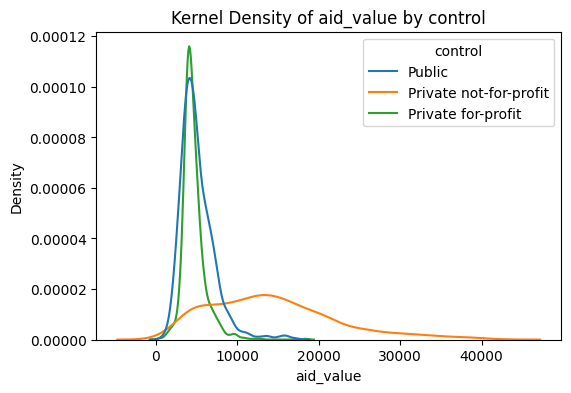

In [268]:
# grouped by control
plt.figure(figsize=(6,4))
sns.kdeplot(data=college, x='aid_value', hue='control')
plt.title('Kernel Density of aid_value by control')
plt.xlabel('aid_value')
plt.show()

In [269]:
# The graph's shape can be explained by most institutions receiving modest amounts of aid, with a few being awarded much higher amounts.

In [270]:
print(college.groupby('level')['aid_value'].describe())

         count          mean          std    min     25%     50%      75%  \
level                                                                       
2-year  1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year  2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

            max  
level            
2-year  13654.0  
4-year  41580.0  


In [271]:
print(college.groupby('control')['aid_value'].describe())

                         count          mean          std    min      25%  \
control                                                                     
Private for-profit       991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit  1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                  1558.0   5094.835687  2136.436370  881.0  3725.25   

                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0  


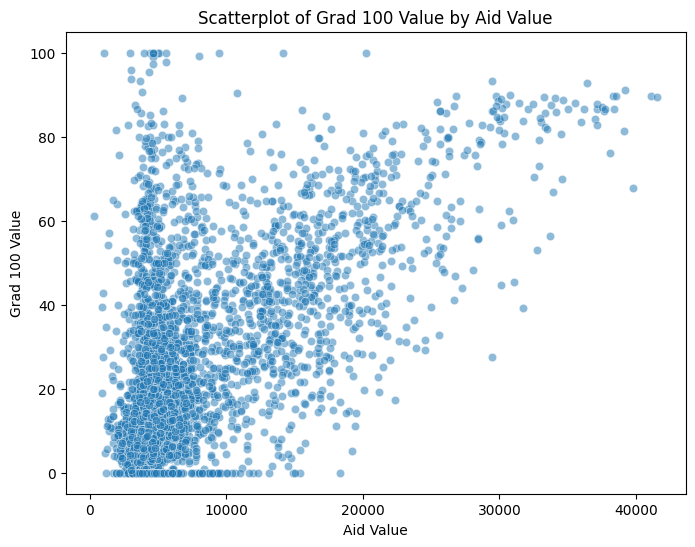

In [272]:
# scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=college['aid_value'], y=college['grad_100_value'], alpha=0.5)
plt.xlabel("Aid Value")
plt.ylabel("Grad 100 Value")
plt.title("Scatterplot of Grad 100 Value by Aid Value")
plt.show()

In [273]:
# There seems to be a strong linear correlation between aid value and grad 100 value, where they both increase when the other does. There are some outliers, especially around the lower aid values, in which the grad 100 value is still high.

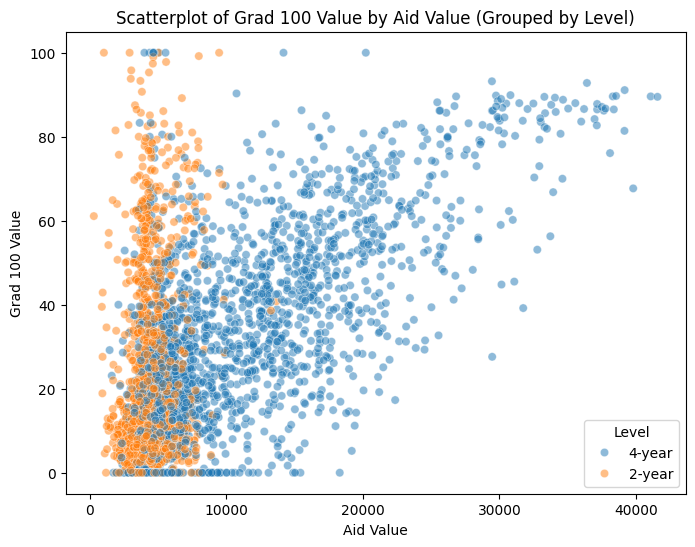

In [274]:
# Grouped by level
plt.figure(figsize=(8, 6))
sns.scatterplot(x=college['aid_value'], y=college['grad_100_value'], hue=college['level'], alpha=0.5)
plt.xlabel("Aid Value")
plt.ylabel("Grad 100 Value")
plt.title("Scatterplot of Grad 100 Value by Aid Value (Grouped by Level)")
plt.legend(title="Level")
plt.show()

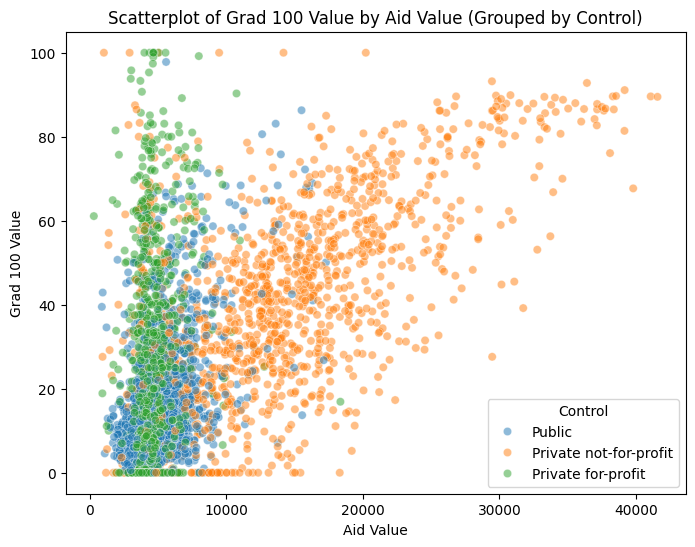

In [275]:
# Grouped by control
plt.figure(figsize=(8, 6))
sns.scatterplot(x=college['aid_value'], y=college['grad_100_value'], hue=college['control'], alpha=0.5)
plt.xlabel("Aid Value")
plt.ylabel("Grad 100 Value")
plt.title("Scatterplot of Grad 100 Value by Aid Value (Grouped by Control)")
plt.legend(title="Control")
plt.show()

In [276]:
# We can see that there is still a visible linear correlation between aid value and grad 100 value, but for certain colleges. Specificially, it seems that and increase in aid value seems to increase the grad 100 value in private not for profit 4 year institutions.